In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
import numpy as np
from scipy.stats import ttest_rel
from ggplot import *
%matplotlib inline
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn import linear_model 
import statsmodels.formula.api as sm
import scipy, scipy.stats
from sklearn.model_selection import train_test_split
from sklearn import cross_validation
from sklearn.model_selection import KFold

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


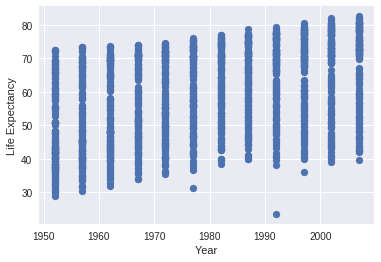

In [2]:
data = pd.read_csv("08_gap-every-five-years.tsv", sep='\t')
#data.boxplot(column='lifeExp', by='year')
plt.scatter(data.year, data.lifeExp)
plt.ylabel('Life Expectancy')
plt.xlabel('Year')
plt.title('')
plt.show()

Question 1:

Life expectancy increases over time and the plot seems to be pretty much linear. 

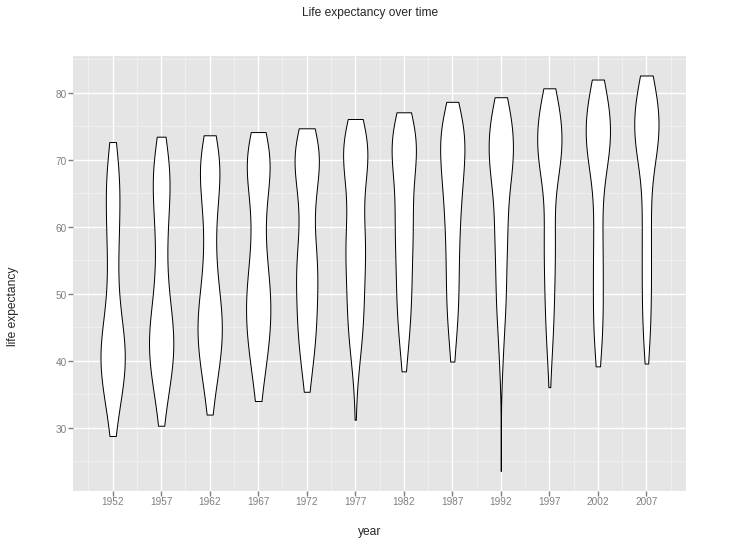

<ggplot: (-9223363293230983024)>

In [3]:
ggplot(aes(x='year', y='lifeExp'), data=data) +\
    geom_violin() +\
    labs(title="Life expectancy over time",
         x = "year",
         y = "life expectancy")

Question 2:

The life expectancy accorss countires appears to be skewed left in the years following 1972. It seems that the majority of the countries in these years have a high life expectancy while fewer countires still have lower life expectancies. None of the years are symmetric and the years before 1977 are bimodal while the rest of the years are unimodal.

Question 3: Yes

Question 4: It will probably not be equally distributed and could potentially have some shape since the data does not appear to be uniform within each year. 

Question 5: If the assumptions of linear regression were to hold, the violin plot should have each violin on the same horizontal line and each uniformly distributed. 

In [4]:
#Excercise 2
regr = linear_model.LinearRegression()

data['Intercept'] = np.ones(( len(data), ))
y = data.lifeExp
X = data[['year','Intercept']]
e2 = sm.OLS( y, X ).fit()
data['residuals'] = y - e2.fittedvalues
print(e2.summary())

                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     398.6
Date:                Mon, 20 Nov 2017   Prob (F-statistic):           7.55e-80
Time:                        21:24:46   Log-Likelihood:                -6597.9
No. Observations:                1704   AIC:                         1.320e+04
Df Residuals:                    1702   BIC:                         1.321e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
year           0.3259      0.016     19.965      0.0

Question 6: 0.3259

Question 7: Yes, because the p-value is less than 0.05.

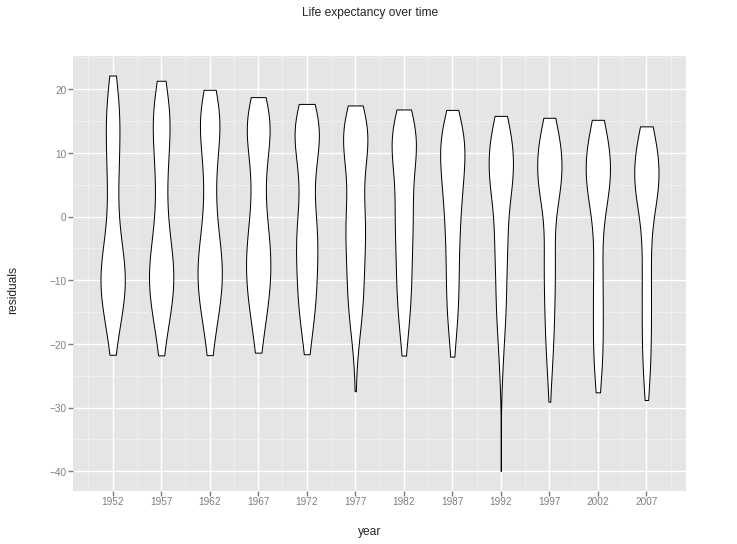

<ggplot: (8743619409363)>

In [5]:
#Exercise 3
ggplot(aes(x='year', y='residuals'), data=data) +\
    geom_violin() +\
    labs(title="Life expectancy over time",
         x = "year",
         y = "residuals")

Question 8: Yes, it matches my expectations because the is a negative linear trend which means the data is not homoscedastic. 

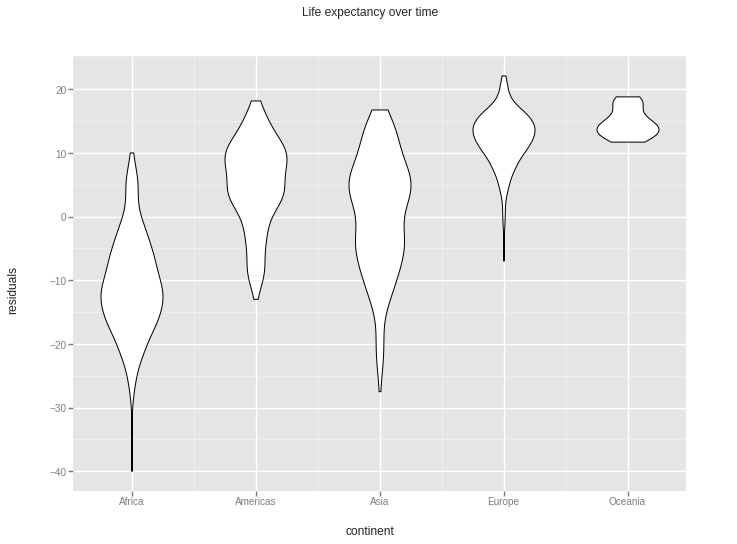

<ggplot: (-9223363293236519550)>

In [6]:
#Exercise 4
ggplot(aes(x='continent', y='residuals'), data=data) +\
    geom_violin() +\
    labs(title="Life expectancy over time",
         x = "continent",
         y = "residuals")

Question 9:

Yes. This suggests that when performing a regression analysis of life expectancy over time it will not give us an accurate answer since the data is dependent on another variable. 

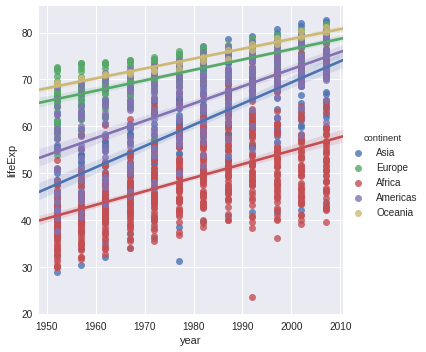

In [7]:
#Exercise 5
sns.lmplot(x='year', y='lifeExp', hue='continent', data=data)

Question 10: Yes because the each continent has a different regression line and has a different mean for each year.

In [8]:
#Exercise 6
cont_nums = pd.factorize(data['continent'])[0]
data['cont_nums'] = cont_nums
data['inter'] = data.apply(lambda row: (row['year']*row['cont_nums']), axis=1)
y = data.lifeExp
X = data[['year','cont_nums', 'inter', 'Intercept']]
e6 = sm.OLS( y, X ).fit()
data['residuals2'] = y - e6.fittedvalues
data['fitted'] = e6.fittedvalues

print(e6.summary())

                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     145.5
Date:                Mon, 20 Nov 2017   Prob (F-statistic):           6.53e-84
Time:                        21:24:48   Log-Likelihood:                -6582.4
No. Observations:                1704   AIC:                         1.317e+04
Df Residuals:                    1700   BIC:                         1.319e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
year           0.3698      0.028     13.127      0.0

Question 11: No. Continent and the interaction parameters are not significantly different from 0 since their p-values are greater than 0.05.

In [9]:
#Question 12
coefs = []
for i,g in data.groupby('continent'):
    X = np.array(g.year)
    y = g.lifeExp
    
    regr.fit(X.reshape(len(X), 1),y)
    
    coefs.append((i, regr.coef_[0]))

for c, i in coefs:
    print("%s:   \t %f" % (c,i))

Africa:   	 0.289529
Americas:   	 0.367651
Asia:   	 0.453122
Europe:   	 0.221932
Oceania:   	 0.210272


In [10]:
#Exercise 7
print(e2.f_test(np.identity(2)))
print(e6.f_test(np.identity(4)))

<F test: F=array([[ 22478.49562879]]), p=0.0, df_denom=1702, df_num=2>
<F test: F=array([[ 11438.83315521]]), p=0.0, df_denom=1700, df_num=4>


Question 13: The interaction model is not signicantly different than the year-only model because they both a high F-value.

In [11]:
#Exercise 8


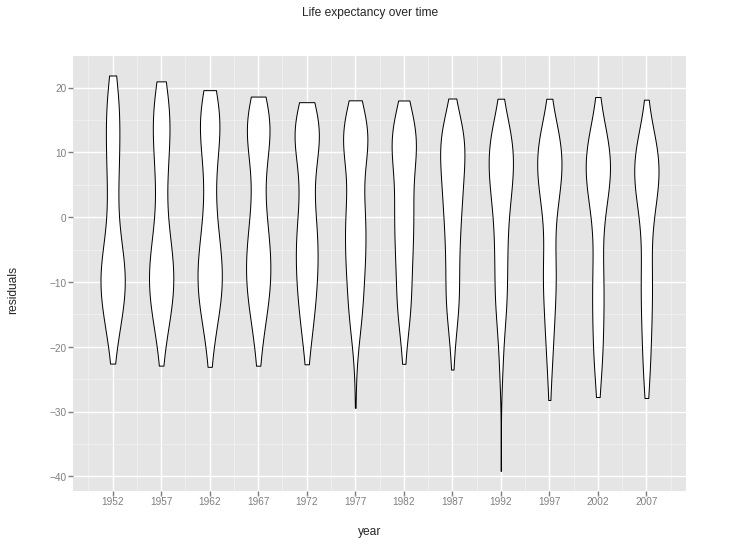

<ggplot: (8743618151951)>

In [12]:
ggplot(aes(x='year', y='residuals2'), data=data) +\
    geom_violin() +\
    labs(title="Life expectancy over time",
         x = "year",
         y = "residuals")

# Part 2: Classification
## Problem 1

In [13]:
#Problem 1
gen_data_x, gen_data_y, coef = sklearn.datasets.make_regression(n_samples=100, n_features=20, noise = 1.5, coef = True)

#equation given in class
#modified for multiple parameters
def grad_descent(X, y, T, alpha):
    m, n = X.shape
    theta = np.zeros(n)
    f = np.zeros(T)
    
    for i in range(T):
        #Squared loss and linear hypothesis function
        f[i] = 0.5*np.linalg.norm(X.dot(theta) - y)**2
        g = X.T.dot(X.dot(theta) - y)
        theta = theta - alpha*g
        
    return theta, f

Below is a plot of the simulation vs estimated paramets. This forms a linear line because gradient descent found the parameters that fit the data. 

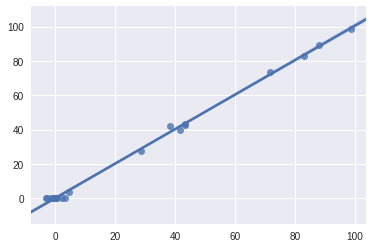

In [14]:
alpha = 0.01 # learning rate
T = 50 # steps
theta,loss = grad_descent(gen_data_x, gen_data_y, T, alpha)
sns.regplot(x=theta, y=coef)

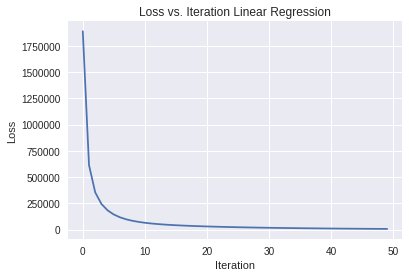

In [15]:
plt.plot(np.arange(T), loss)
plt.title('Loss vs. Iteration Linear Regression')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

## Problem 2
The goal of the update function is to maximize the log-likelihood function so we start off with that function.
<br>
Log-likelihood function:
$L=\sum_{i=1, y_{i}=1}^{N}{log(p_{i})}+\sum_{i=0, y_{i}=0}^{N}{log(1-p_{i})}$
<br><br>
Derivative with respect to b:
${L}'=\sum_{i=0, y_{i}=1}^{N}{\frac{p_{i} \prime}{p_{i}}}x_{i}+\sum_{i=0, y_{i}=0}^{N}{\frac{p_{i} \prime}{(1-p_{i})}}x_{i}$
<br><br>
We can subsitute $p_{i}(1-p_{i})$ for $p_{i} \prime$
<br>
${L}'=\sum_{i=i, y_{i}=1}^{N}{\frac{p_{i}(1-p_{i})}{p_{i}}}x_{i}+\sum_{i=1, y_{i}=0}^{N}{\frac{p_{i}(1-p_{i})}{(1-p_{i})}}x_{i}$
<br><br>
${L}'=\sum_{i=1, y_{i}=1}^{N}{(1-p_{i})}x_{i}+\sum_{i=1, y_{i}=0}^{N}{p_{i}x_{i}}$
<br>
${L}'=\sum_{i=1}^{N}{[y_{i}(1-p_{i})-(1-y_{i})p_{i}]x_{i}}$
<br>
${L}'=\sum_{i=1}^{N}{(y_{i}-p_{i})x_{i}}$
<br>
The rest of the update equation is from the given gradient descent update formula, which includes $\alpha$ and $\beta$

## Problem 3

This implementation of gradient descent is using the batch method.

In [16]:
#simulate data for logistic regression.  This is similar to linear, only now values are either 0 or 1.  
log_gen_data_x, dump_y, log_coef = sklearn.datasets.make_regression(n_samples=100, n_features=20, noise = 1.5, coef = True)
log_gen_data_y = [0 if i>0 else 1 for i in dump_y]

def logistic_func(theta, x):
    return float(1) / (1 + np.exp(-x.dot(theta)))

def log_gradient(theta, x, y):
    first_calc = logistic_func(theta, x) - np.squeeze(y)
    final_calc = first_calc.T.dot(x)
    return final_calc

def grad_desc(X, y, T, alpha):
    m, n = X.shape
    theta = np.zeros(n)
    f = np.zeros(T)
    y = np.array(y)
    for i in range(T):
        Yhat = X.dot(theta)
        f[i] = np.sum(np.log(1+np.exp(-y*Yhat))) #loss
        g = (X - np.mean(X, axis=0)) / np.std(X, axis=0) #normalize x values
        theta = theta - (alpha * log_gradient(theta, g, y)) #calcuate gradient and update theta

    return theta,f

def pred_values(theta, X):
    #normalize
    X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    
    #get the probabilty which is 0<=p<=1 
    pred_prob = logistic_func(theta, X)
    
    #classifies values if probablity is greater than or less 0.5
    pred_value = np.where(pred_prob >= .5, 1, 0)
    
    return pred_value

#calculates number of correct predictions and returns it as a percentage
def score(pred, actual):
    scores = 0
    for i in range(len(pred)):
        result = pred[i] - actual[i]
        if (result == 0):
            scores += 1
    return scores/len(pred)

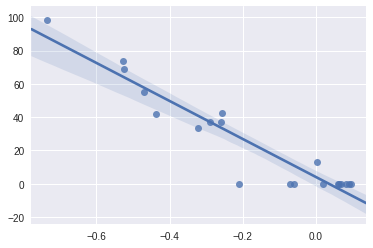

In [17]:
T = 50
alpha = .001
theta, loss = grad_desc(log_gen_data_x, log_gen_data_y, T, alpha)
sns.regplot(x=theta, y=log_coef)

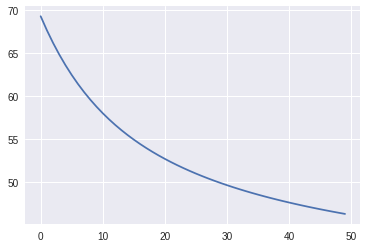

In [18]:
plt.plot(np.arange(T), loss)

This graph of loss vs iteration follows the trajectory for a logistic loss since that is what I am using in this problem. 

## Problem 4

In this problem, I am using the breast cancer data which is from the sklearn module. The goal is to try and predict whether or not someone has breast cancer based on the the different predictors. There are several predictors that include different measurements of the cell nucleus.

The data does not need to be transformed since it contains all real values.

I choose to look at Linear Discriminant Analysis and Linear SVM for the paired t-test to compare the scores. I also choose to look at a few other algorithms just to see how well they did and provide additional visualization.

In [19]:
bc = load_breast_cancer()
X = bc.data
Y = bc.target
kf = KFold(n_splits=10)
T = 50
train_errors = []
validation_errors = []
for train_index, test_index in kf.split(X):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    theta, train_loss = grad_desc(x_train, y_train, T, .0001)
    
    #training error
    predicted_train = pred_values(theta, x_train)
    res = score(predicted_train, y_train)
    train_errors.append(res)

    #validation error
    validation_train = pred_values(theta, x_test)
    res = score(validation_train, y_test)
    validation_errors.append(res)

train_errors = np.array(train_errors)
validation_errors = np.array(validation_errors)
print(train_errors.mean())
print(validation_errors.mean())

0.963872898392
0.9085839599


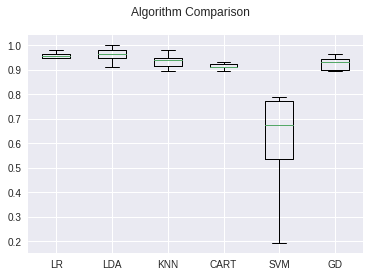

In [20]:
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
# boxplot algorithm comparison
results.append(validation_errors)
names.append("GD")
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [21]:
lda = ttest_rel(train_errors,results[1])
print("Paried T-Test of LDA vs. Logistic Regression (Gradient Descent)")
print("T-statistic: %.3f" % lda.statistic)
print("p-value: %.3f" % lda.pvalue)

Paried T-Test of LDA vs. Logistic Regression (Gradient Descent)
T-statistic: 0.459
p-value: 0.657


It is evident from this T-test that LDA and Logistic Gradient Descent did not perform significantly different from each other. They both had a good average score when predicting the outcomes for breast cancer.

In [22]:
svm = ttest_rel(train_errors,results[4])
print("Paried T-Test of a Linear SVM vs. Logistic Regression (Gradient Descent)")
print("T-statistic: %.3f" % svm.statistic)
print("p-value: %.3f" % svm.pvalue)

Paried T-Test of a Linear SVM vs. Logistic Regression (Gradient Descent)
T-statistic: 5.813
p-value: 0.000


It is evident from this T-test that a Linear SVM and Logistic Gradient Descent did perform significantly different from each other since the p-value was less than 0.05.